In [4]:
# import zipfile
# !wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
# zipref=zipfile.ZipFile("10_food_classes_10_percent.zip")
# zipref.extractall()
# zipref.close()

In [5]:
import os

for dirpath, dirnames, filenames in os.walk("10_food_classes_10_percent"):
    print(f"There are {len(dirnames)} directories, {len(filenames)} images in {dirpath}.")

There are 2 directories, 0 images in 10_food_classes_10_percent.
There are 10 directories, 0 images in 10_food_classes_10_percent/train.
There are 0 directories, 75 images in 10_food_classes_10_percent/train/chicken_wings.
There are 0 directories, 75 images in 10_food_classes_10_percent/train/fried_rice.
There are 0 directories, 75 images in 10_food_classes_10_percent/train/steak.
There are 0 directories, 75 images in 10_food_classes_10_percent/train/hamburger.
There are 0 directories, 75 images in 10_food_classes_10_percent/train/ramen.
There are 0 directories, 75 images in 10_food_classes_10_percent/train/chicken_curry.
There are 0 directories, 75 images in 10_food_classes_10_percent/train/sushi.
There are 0 directories, 75 images in 10_food_classes_10_percent/train/pizza.
There are 0 directories, 75 images in 10_food_classes_10_percent/train/ice_cream.
There are 0 directories, 75 images in 10_food_classes_10_percent/train/grilled_salmon.
There are 10 directories, 0 images in 10_food

In [6]:
import tensorflow as tf
from tensorflow.python import keras
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

2023-06-14 21:49:26.751432: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-14 21:49:28.406266: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/soumik/anaconda3/pkgs/cuda-nvcc
2023-06-14 21:49:28.406405: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/soumik/anaconda3/pkgs/cuda-nvcc
2023-06-14 21:49:28.406415: W tensorflow/compiler/tf

In [7]:
IMAGE_SHAPE=(224,224)
BATCH_SIZE=32

train_dir="10_food_classes_10_percent/train/"
test_dir="10_food_classes_10_percent/test/"

train_datagen=ImageDataGenerator(rescale=1/255.)
test_datagen=ImageDataGenerator(rescale=1/225.)

print("Train Data:")
train_data=train_datagen.flow_from_directory(train_dir,target_size=IMAGE_SHAPE,
                                            batch_size=BATCH_SIZE,class_mode="categorical")

print("Test Data:")
test_data=test_datagen.flow_from_directory(test_dir,target_size=IMAGE_SHAPE,
                                            batch_size=BATCH_SIZE,class_mode="categorical")


Train Data:
Found 750 images belonging to 10 classes.
Test Data:
Found 2500 images belonging to 10 classes.


In [8]:
#Callbacks are extra functionality we can add to our models

import datetime

def create_tensorboard_callback(dir_name,exp_name):
    log_dir=dir_name+"/"+exp_name+"/"+datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=log_dir)
    print(f"Saving TensorBoard log files to: {log_dir}")
    return tensorboard_callback

In [9]:
# We can access pre-trained models at https://tfhub.dev/

resnet_url="https://tfhub.dev/google/imagenet/resnet_v2_152/feature_vector/5"
efficientnet_url="https://tfhub.dev/google/efficientnet/b2/feature-vector/1"

In [10]:
import tensorflow_hub as hub
from keras import layers

In [11]:
def create_model(model_url,num_classes=10):
    features_extractor=hub.KerasLayer(model_url,trainable=False,
                                    name="feature_extractor",input_shape=IMAGE_SHAPE+(3,))
    model=tf.keras.Sequential([
        features_extractor,
        layers.Dense(num_classes,activation="softmax",name="output_layer")
    ])
    return model

In [12]:
#EfficientNet model is better (believe me!)

model=create_model(efficientnet_url)
model

2023-06-14 21:49:32.128790: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-06-14 21:49:32.205031: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-06-14 21:49:32.205296: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-06-14 21:49:32.206260: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorF

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extractor (KerasLay  (None, 1408)             7768562   
 er)                                                             
                                                                 
 output_layer (Dense)        (None, 10)                14090     
                                                                 
Total params: 7,782,652
Trainable params: 14,090
Non-trainable params: 7,768,562
_________________________________________________________________


In [14]:
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),metrics=["accuracy"],
            optimizer=tf.keras.optimizers.Adam())

In [17]:
history=model.fit(train_data,epochs=10,steps_per_epoch=len(train_data),
        validation_data=test_data,validation_steps=len(test_data),
        callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub",exp_name="efficient_net")])

Saving TensorBoard log files to: tensorflow_hub/efficient_net/20230614-220002
Epoch 1/10
24/24 [==============================] - 13s 565ms/step - loss: 0.4241 - accuracy: 0.9187 - val_loss: 0.5264 - val_accuracy: 0.8584
Epoch 2/10
24/24 [==============================] - 16s 670ms/step - loss: 0.3739 - accuracy: 0.9280 - val_loss: 0.5042 - val_accuracy: 0.8588
Epoch 3/10
24/24 [==============================] - 13s 565ms/step - loss: 0.3346 - accuracy: 0.9427 - val_loss: 0.4858 - val_accuracy: 0.8604
Epoch 4/10
24/24 [==============================] - 13s 556ms/step - loss: 0.3021 - accuracy: 0.9467 - val_loss: 0.4765 - val_accuracy: 0.8632
Epoch 5/10
24/24 [==============================] - 13s 559ms/step - loss: 0.2696 - accuracy: 0.9613 - val_loss: 0.4668 - val_accuracy: 0.8604
Epoch 6/10
24/24 [==============================] - 13s 559ms/step - loss: 0.2450 - accuracy: 0.9667 - val_loss: 0.4580 - val_accuracy: 0.8644
Epoch 7/10
24/24 [==============================] - 13s 557ms/st

In [16]:
def plot_loss_curves(history):
    train_loss=history.history["loss"]
    accuracy=history.history["accuracy"]
    val_loss=history.history["val_loss"]
    val_accuracy=history.history["val_accuracy"]
    epochs=range(len(history.history["loss"]))

    plt.plot(epochs,train_loss,label="training_loss")
    # plt.subplot(1,4,2)
    plt.plot(epochs,val_loss,label="val_loss")
    plt.title("loss")
    plt.xlabel("epochs")
    plt.legend()

    plt.plot(epochs,accuracy,label="train_accuracy")
    # plt.subplot(1,4,4)
    plt.plot(epochs,val_accuracy,label="val_accuracy")
    plt.title("accuracy")
    plt.xlabel("epochs")
    plt.legend()
    plt.show()

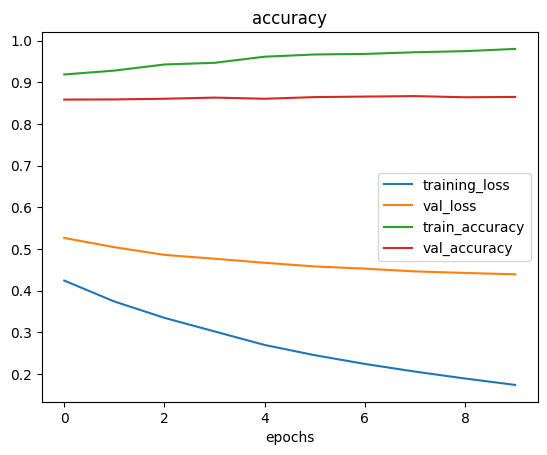

In [18]:
plot_loss_curves(history)

In [20]:
# Run in terminal
# tensorboard dev upload --logdir ./tensorflow_hub \
# --name "efficientnet" \
# --description "analyzing model's performance" \
# --one_shot

2023-06-14 22:06:29.837702: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-14 22:06:30.503305: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/soumik/anaconda3/pkgs/cuda-nvcc
2023-06-14 22:06:30.503367: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/soumik/anaconda3/pkgs/cuda-nvcc
2023-06-14 22:06:30.503375: W tensorflow/compiler/tf

In [22]:
!tensorboard dev list

2023-06-14 22:13:10.616933: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-14 22:13:11.364233: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/soumik/anaconda3/pkgs/cuda-nvcc
2023-06-14 22:13:11.364292: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/soumik/anaconda3/pkgs/cuda-nvcc
2023-06-14 22:13:11.364300: W tensorflow/compiler/tf